In [1]:
import matplotlib.pyplot as plt
import numpy as np

import DissimilarityMetrics
import ChannelChartingCore
import Evaluation

2024-10-09 09:50:57.474983: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-09 09:50:58.480153: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# This may take some time
import dichasus_cf0x

2024-10-09 09:51:00.498785: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-09 09:51:00.625791: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-09 09:51:00.626182: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

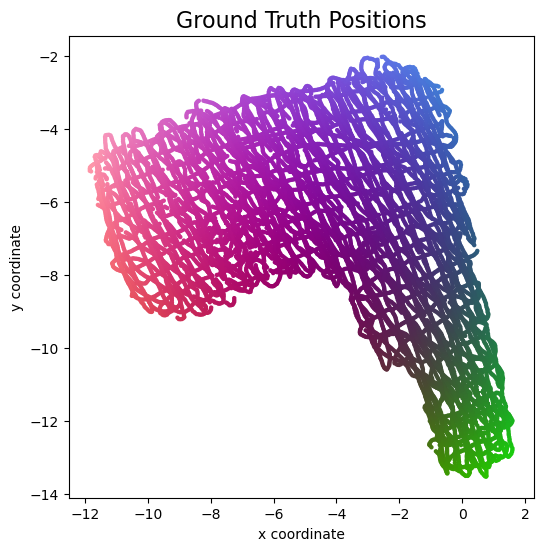

In [3]:
Evaluation.plot_colorized(dichasus_cf0x.groundtruth_positions, dichasus_cf0x.groundtruth_positions, title="Ground Truth Positions")

In [4]:
def mean_variance_from_delta_adp(delta_adp):
    mean = np.where(delta_adp == 0, 0, np.where(delta_adp > 20, np.inf, delta_adp * 0.0025 + 0.004))
    variance = np.where(delta_adp == 0, 0, np.where(delta_adp > 20, np.inf, 0.01 * mean))

    return mean, variance

adp_metric = DissimilarityMetrics.ADPDissimilarityMetric(dichasus_cf0x.csi_time_domain, mean_variance_from_delta_adp)

In [5]:
velocity_mean = 0.235
velocity_variance = 0.007

# Make worste-case assumption of perfectly correlated velocities. This maximizes the variance.
velocity_metric = DissimilarityMetrics.VelocityDissimilarityMetric(velocity_mean, velocity_variance, True, dichasus_cf0x.timestamps)

In [6]:
v_dis_matrix = velocity_metric.get_realization()

In [7]:
v_dis_matrix[5920, 5923]

0.16715322265625

In [8]:
v_dis_matrix[5920, 5921] + v_dis_matrix[5921, 5922] + v_dis_matrix[5922, 5923]

0.16735322265625002

In [9]:
GDM = ChannelChartingCore.GaussianDissimilarityModel([adp_metric, velocity_metric])
GDM.generate_short_paths(realization_count = 8)

  0%|          | 0/8 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


  0%|          | 0/104255000 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


  0%|          | 0/104255000 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


  0%|          | 0/104255000 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


  0%|          | 0/104255000 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


  0%|          | 0/104255000 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


  0%|          | 0/104255000 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


  0%|          | 0/104255000 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


  0%|          | 0/104255000 [00:00<?, ?it/s]

In [10]:
paths, path_hops, total_dissimilarity_means, total_dissimilarity_variances = GDM.get_random_short_paths(10000, 458)
longest = np.argmax(path_hops)
print(path_hops[longest], paths[longest])

349 [15719 15718 15717 15716  4233  4234  4235  7898  7899  4237  4238  4239
  4240  4241  4242 15681  4243  4244  4245  4246  4247  4248  4369  4370
  4371  4372  4373  4182  4181 19154 19155 15111 15112 15113 15115 15116
 15118 15119 15120 15121 15122 15124  4127  4128  4129  4131  4132  4133
  4134  4135  4136  7927  7928  7929  7930  7931  7932  7933  7934  7935
 19567 19566 19565 19564 19563 19562 19561 19560 19559 19558 19557 19556
 19555 19554 19553 19552 19551 19550 19549 19548 19547 19708 19709 19710
 19711 19543  7817  7816 19542  7815 19541 19540  7813  7812 19717 19718
 19536 19720 19535 19534 19722 19533 19532 19531 19530 19529 19528 19527
 19526 19525 19524 19523 19733 19734 19735 19736 19519 19518 19738 19517
 19516 19741 19514 19742 19513 19512 19511  7733  7734 19509 19508 19507
 19506 19505 19504 19503 19501 19500 19499 19497 19496  3397 19495 19494
 19493 19492 19491 19490 19489  3369  3370 19488 19487 19486 19485 19484
 19483 19482 19481  3177  3176  3175  3174  317

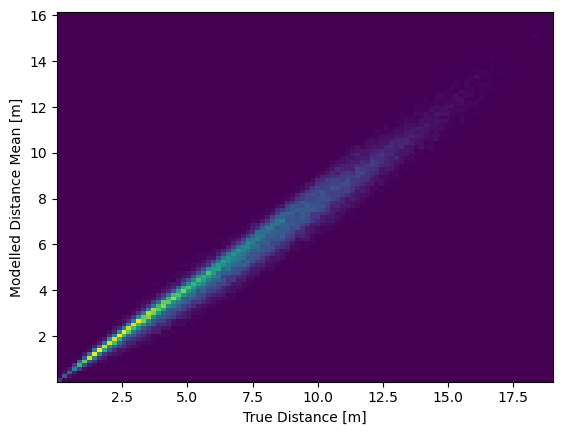

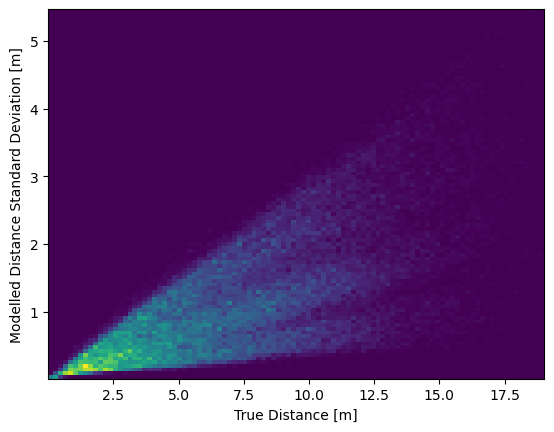

In [11]:
paths, path_hops, paths_d_mean, paths_d_variance = GDM.get_random_short_paths(50000, 100)
groundtruth_distance_matrix = np.sqrt(np.sum((dichasus_cf0x.groundtruth_positions[:,np.newaxis,:] - dichasus_cf0x.groundtruth_positions[np.newaxis,:,:])**2, axis = -1))
groundtruth_dist = np.sum(groundtruth_distance_matrix[paths[:,:-1], paths[:,1:]], axis = 1).flatten()

plt.xlabel("True Distance [m]")
plt.ylabel("Modelled Distance Mean [m]")
plt.hist2d(groundtruth_dist, paths_d_mean, bins = 100)
plt.show()

plt.xlabel("True Distance [m]")
plt.ylabel("Modelled Distance Standard Deviation [m]")
plt.hist2d(groundtruth_dist, np.sqrt(paths_d_variance), bins = 100)
plt.show()

In [12]:
BATCH_SIZE = 3000
LEARNING_RATE_INITIAL = 1e-2
LEARNING_RATE_FINAL = 1e-5
MIN_PATHHOPS = 1
MAX_PATHHOPS = 30
TRAINING_BATCHES = 2000

In [13]:
import importlib
importlib.reload(ChannelChartingCore)
importlib.reload(Evaluation)

<module 'Evaluation' from '/home/jovyan/Geodesic-Uncertainty-Loss-ChannelCharting/Evaluation.py'>

I0000 00:00:1728467830.263419   30232 service.cc:145] XLA service 0x7f4b941de590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728467830.263475   30232 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2024-10-09 09:57:10.439941: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-09 09:57:10.743268: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-10-09 09:57:11.520366: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:742] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility

tf.Tensor(0.01, shape=(), dtype=float32)
   1/2000 ━━━━━━━━━━━━━━━━━━━━ 3:09:58 6s/step - loss: 32.9123 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
tf.Tensor(0.01, shape=(), dtype=float32)
   3/2000 ━━━━━━━━━━━━━━━━━━━━ 2:34 78ms/step - loss: 33.3997 - metric: 0.0000e+00 tf.Tensor(0.01, shape=(), dtype=float32)
   4/2000 ━━━━━━━━━━━━━━━━━━━━ 3:29 105ms/step - loss: 32.5238 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
   5/2000 ━━━━━━━━━━━━━━━━━━━━ 3:39 110ms/step - loss: 31.4455 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
   6/2000 ━━━━━━━━━━━━━━━━━━━━ 3:54 118ms/step - loss: 30.3010 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
   7/2000 ━━━━━━━━━━━━━━━━━━━━ 3:58 120ms/step - loss: 29.1861 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
   8/2000 ━━━━━━━━━━━━━━━━━━━━ 4:04 123ms/step - loss: 28.1411 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
   9/2000 ━━━━━━━━━━━━━━━━━━━━ 4:04 123ms/step - l

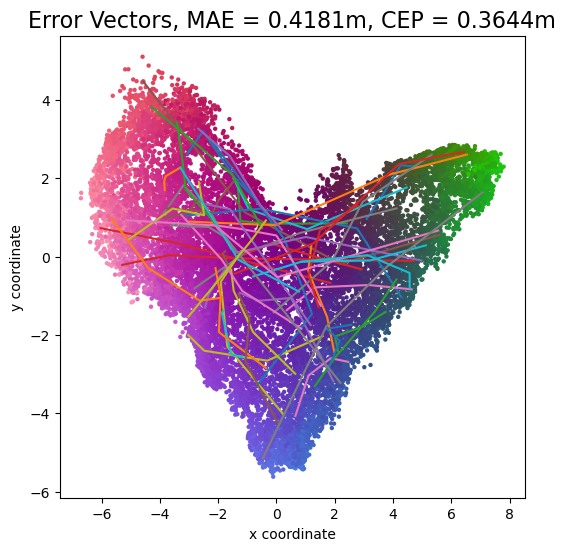

 200/2000 ━━━━━━━━━━━━━━━━━━━━ 4:02 135ms/step - loss: 6.2330 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 201/2000 ━━━━━━━━━━━━━━━━━━━━ 4:01 134ms/step - loss: 6.2165 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
tf.Tensor(0.01, shape=(), dtype=float32)
 203/2000 ━━━━━━━━━━━━━━━━━━━━ 4:00 134ms/step - loss: 6.1837 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 204/2000 ━━━━━━━━━━━━━━━━━━━━ 4:00 134ms/step - loss: 6.1675 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 205/2000 ━━━━━━━━━━━━━━━━━━━━ 4:00 134ms/step - loss: 6.1514 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 206/2000 ━━━━━━━━━━━━━━━━━━━━ 4:00 134ms/step - loss: 6.1355 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 207/2000 ━━━━━━━━━━━━━━━━━━━━ 4:00 134ms/step - loss: 6.1197 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 208/2000 ━━━━━━━━━━━━━━━━━━━━ 3:59 134ms/step - loss: 6.1040 - metric: 0.0000e+00tf.Tensor(0.01, 

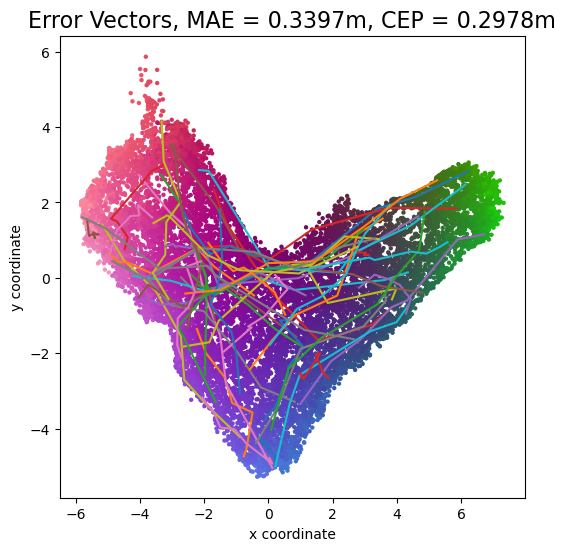

 400/2000 ━━━━━━━━━━━━━━━━━━━━ 3:33 133ms/step - loss: 4.3182 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
tf.Tensor(0.01, shape=(), dtype=float32)
 402/2000 ━━━━━━━━━━━━━━━━━━━━ 3:32 133ms/step - loss: 4.3067 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 403/2000 ━━━━━━━━━━━━━━━━━━━━ 3:32 133ms/step - loss: 4.3011 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 404/2000 ━━━━━━━━━━━━━━━━━━━━ 3:32 133ms/step - loss: 4.2954 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 405/2000 ━━━━━━━━━━━━━━━━━━━━ 3:32 133ms/step - loss: 4.2898 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 406/2000 ━━━━━━━━━━━━━━━━━━━━ 3:31 133ms/step - loss: 4.2841 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 407/2000 ━━━━━━━━━━━━━━━━━━━━ 3:31 133ms/step - loss: 4.2785 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 408/2000 ━━━━━━━━━━━━━━━━━━━━ 3:31 133ms/step - loss: 4.2730 - metric: 0.0000e+00tf.Tensor(0.01, 

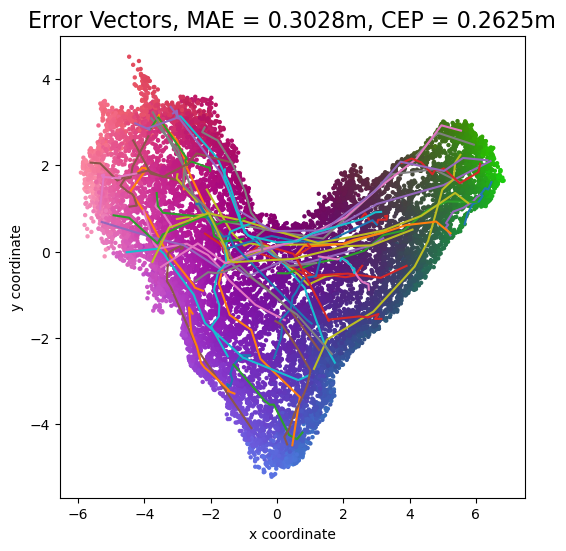

 600/2000 ━━━━━━━━━━━━━━━━━━━━ 3:05 133ms/step - loss: 3.4736 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
tf.Tensor(0.01, shape=(), dtype=float32)
 602/2000 ━━━━━━━━━━━━━━━━━━━━ 3:05 133ms/step - loss: 3.4673 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 603/2000 ━━━━━━━━━━━━━━━━━━━━ 3:05 133ms/step - loss: 3.4641 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 604/2000 ━━━━━━━━━━━━━━━━━━━━ 3:05 133ms/step - loss: 3.4610 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 605/2000 ━━━━━━━━━━━━━━━━━━━━ 3:04 133ms/step - loss: 3.4579 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 606/2000 ━━━━━━━━━━━━━━━━━━━━ 3:04 133ms/step - loss: 3.4548 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 607/2000 ━━━━━━━━━━━━━━━━━━━━ 3:04 133ms/step - loss: 3.4517 - metric: 0.0000e+00tf.Tensor(0.01, shape=(), dtype=float32)
 608/2000 ━━━━━━━━━━━━━━━━━━━━ 3:04 133ms/step - loss: 3.4486 - metric: 0.0000e+00tf.Tensor(0.01, 

In [ ]:
plot_callback = Evaluation.PlotChartCallback(dichasus_cf0x.groundtruth_positions, dichasus_cf0x.csi_time_domain.shape[0], BATCH_SIZE, MAX_PATHHOPS)
cc = ChannelChartingCore.ChannelChart(GDM, dichasus_cf0x.csi_time_domain, dichasus_cf0x.timestamps, batch_size = BATCH_SIZE, learning_rate_initial = LEARNING_RATE_INITIAL, learning_rate_final = LEARNING_RATE_FINAL, min_pathhops = MIN_PATHHOPS, max_pathhops = MAX_PATHHOPS, training_batches = TRAINING_BATCHES, plot_callback = plot_callback)

In [ ]:
channel_chart_positions = cc.predict(dichasus_cf0x.csi_time_domain)

In [ ]:
ct, tw, ks = Evaluation.ct_tw_ks_on_subset(dichasus_cf0x.groundtruth_positions, channel_chart_positions)
print(f"CT: {ct:.4f}\nTW: {tw:.4f}\nKS: {ks:.4f}")

In [ ]:
channel_chart_positions_transformed, errorvectors, errors, mae, cep = Evaluation.mean_absolute_error_transformed(dichasus_cf0x.groundtruth_positions, channel_chart_positions)
Evaluation.plot_colorized(channel_chart_positions_transformed, dichasus_cf0x.groundtruth_positions, title = "CC After Affine Transform")

nth_errorvector = 10
Evaluation.plot_colorized(channel_chart_positions_transformed, dichasus_cf0x.groundtruth_positions, title = f"Error Vectors, MAE = {mae:.4f}m, CEP = {cep:.4f}m", show = False)
plt.quiver(channel_chart_positions_transformed[::nth_errorvector, 0], channel_chart_positions_transformed[::nth_errorvector, 1], errorvectors[::nth_errorvector, 0], errorvectors[::nth_errorvector, 1], color = "black", angles = "xy", scale_units = "xy", scale = 1)
plt.show()

# TODO: Performance
* Maybe learning rate is broken?
* Maybe has something to do with timestamp correction?
* Standard deviation correction?
* Could also plot groundtruth vs path mean distance histogram and so on...
* Otherwise, everything is so similar. Weird...